In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('fer2013.csv')
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [8]:
width, height = 48, 48
datapoints = data['pixels'].tolist()
X = []
y_temp = []
for i, xseq in enumerate(datapoints):
    xx = [int(xp) for xp in xseq.split(' ') if xp]
    if len(xx) == width * height:
        xx = np.asarray(xx).reshape(width, height)
        X.append(xx.astype('float32'))
        y_temp.append(data['emotion'][i])
    else:
        print(f"Skipping data point with incorrect pixel count: {len(xx)}")

X = np.asarray(X)
X = np.expand_dims(X, -1)

# Normalize pixel values
X = X / 255.0

# Encode emotions to categorical data using the temporary list
y = to_categorical(y_temp)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=41)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

Skipping data point with incorrect pixel count: 970
X_train shape: (17818, 48, 48, 1)
y_train shape: (17818, 7)
X_test shape: (2200, 48, 48, 1)
y_test shape: (2200, 7)
X_val shape: (1980, 48, 48, 1)
y_val shape: (1980, 7)


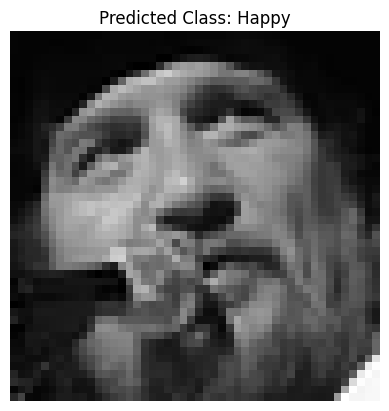

In [15]:
import random

# Choose a random image index
random_index = random.randint(0, len(X_train) - 1)

# Get the image and its corresponding label
image = X_train[random_index]
label = y_train[random_index]

# Get the class with the highest probability
predicted_class = np.argmax(label)

# Emotion labels
emotion_labels = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}


# Display the image
plt.imshow(image[:, :, 0], cmap='gray')
plt.title(f"Predicted Class: {emotion_labels[predicted_class]}")
plt.axis('off')
plt.show()

In [18]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_val, y_val),
                    shuffle=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 44, 44, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 20, 20, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │           7,175 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,351,111 (8.97 MB)

 Trainable params: 2,348,359 (8.96 MB)

 Non-trainable params: 2,752 (10.75 KB)

Epoch 1/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 369s 1s/step - accuracy: 0.2851 - loss: 2.4908 - val_accuracy: 0.2662 - val_loss: 2.2459
Epoch 2/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 369s 1s/step - accuracy: 0.4293 - loss: 1.6356 - val_accuracy: 0.4530 - val_loss: 1.4783
Epoch 3/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 381s 1s/step - accuracy: 0.4862 - loss: 1.3838 - val_accuracy: 0.4712 - val_loss: 1.3802
Epoch 4/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 348s 1s/step - accuracy: 0.5193 - loss: 1.2732 - val_accuracy: 0.4631 - val_loss: 1.5247
Epoch 5/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 385s 1s/step - accuracy: 0.5554 - loss: 1.1780 - val_accuracy: 0.5369 - val_loss: 1.2278
Epoch 6/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.5798 - loss: 1.1066 - val_accuracy: 0.5152 - val_loss: 1.4122
Epoch 7/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 373s 1s/step - accuracy: 0.6052 - loss: 1.0639 - val_accuracy: 0.5444 - val_loss: 1.2563
Epoch 8/10
279/279 ━━━━━━━━━━━━━━━━━━━━ 392s 1s/step - accuracy: 0.6299 - loss: 0.9813 - val_accu

In [22]:
# Save the model
model.save('emotion_detection_model.h5')

In [20]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print the classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=emotion_labels.values()))

69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step
              precision    recall  f1-score   support

       Angry       0.43      0.41      0.42       274
     Disgust       0.86      0.24      0.38        25
        Fear       0.39      0.38      0.38       320
       Happy       0.74      0.86      0.79       561
         Sad       0.50      0.41      0.45       380
    Surprise       0.66      0.74      0.70       229
     Neutral       0.58      0.58      0.58       411

    accuracy                           0.58      2200
   macro avg       0.59      0.52      0.53      2200
weighted avg       0.57      0.58      0.57      2200



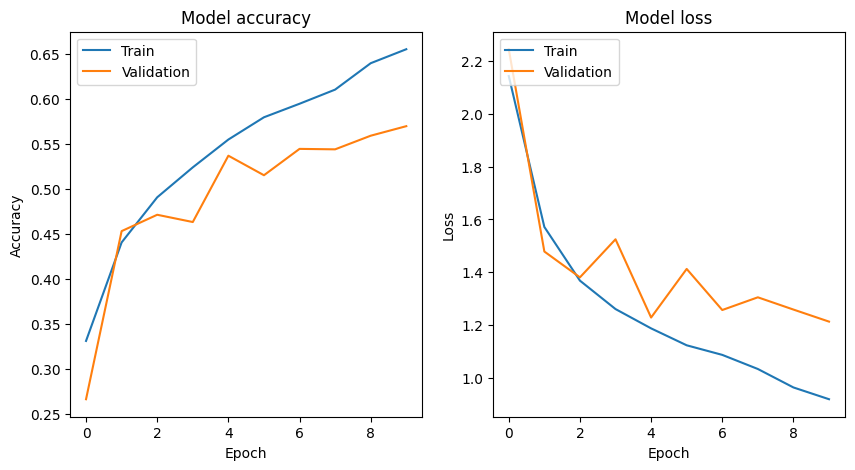

In [21]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [2]:
# prompt: Connect to computer camera to do real time emotion detection with the model

import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('emotion_detection_model.h5')

# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Emotion labels
emotion_labels = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

# Start video capture from the default webcam
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Extract the region of interest (ROI) corresponding to the face
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi_gray = roi_gray.astype('float32') / 255.0
        roi_gray = np.expand_dims(roi_gray, axis=0)
        roi_gray = np.expand_dims(roi_gray, axis=-1)

        # Predict the emotion
        prediction = model.predict(roi_gray)
        max_index = np.argmax(prediction[0])
        emotion = emotion_labels[max_index]

        # Draw a rectangle around the face and put the emotion label
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the resulting frame
    cv2.imshow('Real-Time Emotion Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()